In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy as sp
from pathlib import Path
import tkinter as tk
from tkinter import filedialog
import itertools
from colour import Color
from datetime import date

## Names and Palette ##

In [2]:
today = date.today()
print("Today's date:", today)
date = str(today)
date

Today's date: 2022-07-05


'2022-07-05'

In [3]:
tubulin = '[Tubulin] ' r'$(\mu M)$'
tub = 'tub'

DCXconc = '[DCX] ' r'$(n M)$'
DCX = 'DCX'
Type = 'DCX Type'

Concentration = 'Concentration ' r'$(\mu M)$'
Length = 'Length ' r'$(\mu m)$'
Lifetime = 'Lifetime ' r'$(min)$'
GrowthRate = 'Growth Rate ' r'$(\mu m / min)$'
TimeToNucleate = 'Time to Nucleate ' r'$(min)$'
ShrinkageLength = 'Shrink Length ' r'$(\mu m)$'
ShrinkageLifetime = 'Shrink Lifetime ' r'$(min)$'
ShrinkageRate = 'Shrink Rate ' r'$(\mu m / min)$'

In [4]:
Type_order = ['None', 'Y64N','R76S','R102S', 'R178L', 'P191R', 'G223E','R303X', 'WT']
category_Type = CategoricalDtype(Type_order, ordered=True,) #order mutants

In [5]:
black = '#000000'
grey = '#777777'
blue = '#23459C'
cyan = '#0089CF'
green = '#79BA1A'
purple = '#AB4A9C'
lily = '#CB81EA'
magenta = '#D80B8C'
red = '#e60000'
orange = '#FF7300'
darkorange = '#FF5B00'
lightorange = '#FFAC83'
yellow = '#FFCB05'
lightyellow = '#F9DC2D'
pink = '#FFA4CD'
StartHue1 = Color(purple)
DC1color = list(StartHue1.range_to(Color(pink),3))
StartHue2 = Color(darkorange)
DC2color = list(StartHue2.range_to(Color(lightorange),3))
print(DC1color,DC2color)

palette = [grey] + list(map(Color.get_hex,DC1color)) + list(map(Color.get_hex,DC2color)) + [green,cyan]
parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]

[<Color #ab4a9c>, <Color #e468b8>, <Color #ffa4cd>] [<Color #ff5b00>, <Color #ff8341>, <Color #ffac83>]


## Join Data ##

In [7]:
askdirectory = filedialog.askdirectory() # show an "Open" dialog box and return the path to the selected file
path = Path(askdirectory)

In [14]:
files = [x for x in path.iterdir() if x.is_file()]
files = [i for i in files if (str(i)[-9:] != 'Sheet.csv') == True]
files = [i for i in files if (str(i)[-3:] == 'csv') == True]
files

[WindowsPath('D:/Sofia/Data_Sheets_summer/CallumAnalysis_2021-04-14.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/CallumAnalysis_2021-04-22.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-07-03.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-07-08.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-07-20.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-07-21.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-07-29.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-08-03.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-08-12.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-08-17.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-08-19.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-08-25.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-08-27.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-09-08.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-09-10

In [15]:
data = pd.read_csv(files[0], encoding='utf-8')
for i in range(1,len(files)):
    d = pd.read_csv(files[i], encoding='utf-8')
    data = data.append(d, ignore_index=True)
data[Type].unique()

array(['R102S', 'R303X', 'None', 'WT', 'P191R', 'Y64N', 'R178L', 'G223E',
       'R76S'], dtype=object)

In [16]:

data[Type] = data[Type].astype(category_Type)
data = data.sort_values(by=[Type, DCXconc])
#FIX CONCENTRATION
data[DCXconc] = data[DCXconc].apply(lambda x: round(x*2.27))
np.sort(data[DCXconc].unique())

array([  0,  32,  57,  79, 114, 227], dtype=int64)

In [17]:
data

,Date,Investigator,CH,[Tubulin] $(\mu M)$,[DCX] $(n M)$,Length $(\mu m)$,Lifetime $(min)$,Growth Rate $(\mu m / min)$,Time to Nucleate $(min)$,Shrink Length $(\mu m)$,Shrink Lifetime $(min)$,Shrink Rate $(\mu m / min)$,Rescues,DCX Type
601,2020-07-03,Sofia,13,12.0,0,3.959000,4.024000,0.983847,0.901208,4.066000,0.083833,48.500994,False,None
602,2020-07-03,Sofia,13,12.0,0,7.490000,7.880333,0.950467,0.146708,7.918000,0.167667,47.224652,False,None
603,2020-07-03,Sofia,13,12.0,0,3.210000,3.521000,0.911673,0.230542,3.424000,0.251500,13.614314,False,None
604,2020-07-03,Sofia,13,12.0,0,12.840000,14.335500,0.895679,0.817375,12.947000,1.089833,11.879798,False,None
605,2020-07-03,Sofia,13,12.0,0,3.424000,3.940167,0.868999,0.649708,3.210000,0.251500,12.763419,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939,2021-01-29,Sofia,22,6.0,227,3.729635,6.715666,0.555363,0.605930,0.845384,0.474046,1.783338,True,WT
8940,2021-01-29,Sofia,22,6.0,227,6.115573,10.743261,0.569247,5.305802,1.044122,0.789946,1.321763,True,WT
8941,2021-01-29,Sofia,22,6.0,227,4.376856,8.415779,0.520077,0.645753,1.342899,0.355596,3.776469,True,WT
8942,2021-01-29,Sofia,22,6.0,227,8.121382,16.386184,0.495624,0.530277,4.733321,2.453969,1.928843,True,WT


In [18]:
data.to_csv(path/(date+'_MasterSheet.csv'), encoding='utf-8', index=False)

## Open data if already saved ##

In [13]:
askmastersheet = filedialog.askopenfilename() # show an "Open" dialog box and return the path to the selected file
data = pd.read_csv(askmastersheet, encoding='utf-8')
data

FileNotFoundError: [Errno 2] File b'' does not exist: b''

In [8]:
pathmastersheet = Path(askmastersheet)
resultdirectory = str(pathmastersheet.parents[0])+'//Plots'
newmydir = Path(resultdirectory)
newmydir.mkdir(exist_ok=True)
path = newmydir
path

WindowsPath('C:/Users/Brouhard Lab/Dropbox/DCX/MasterSheets/Plots')

## Seaborn plot #

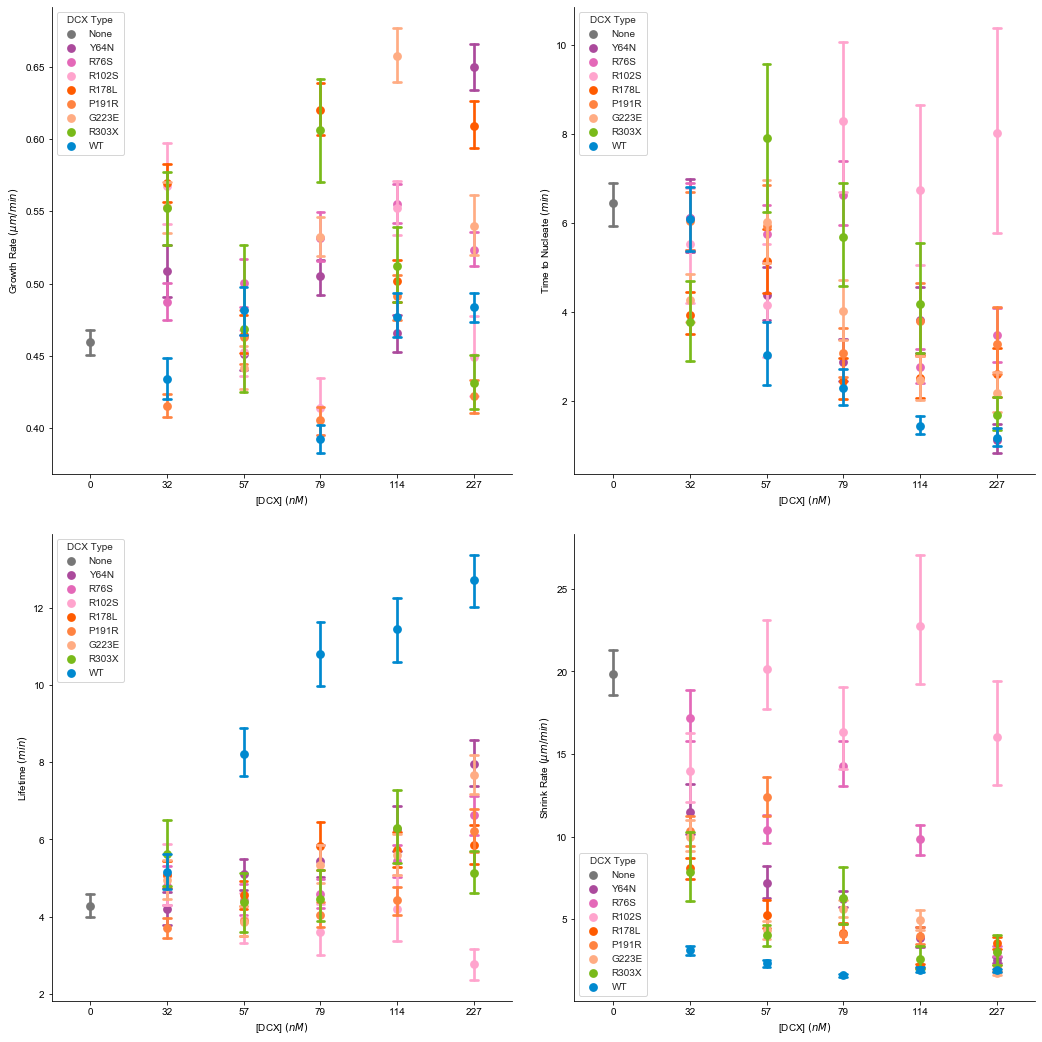

In [19]:
fig, axs = plt.subplots(2,2,figsize=(15,15))
sns.set_style("ticks")

c = 0
for i in [0,1]:
    for j in [0,1]:
        sns.pointplot(x=DCXconc, y=parameters[c],
                        hue=Type, err_style="bars", marker='o', join=False, capsize=.1,
                        data=data[ (data[tubulin]==6)],err_kws={'capsize':10},ci=95 , palette=palette,ax=axs[i][j])
        c += 1
        
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()
#plt.savefig(path/('tub6uM_DCX-variable'+date+'.pdf'))
#plt.savefig(path/('tub6uM_DCX-variable'+date+'.png'))

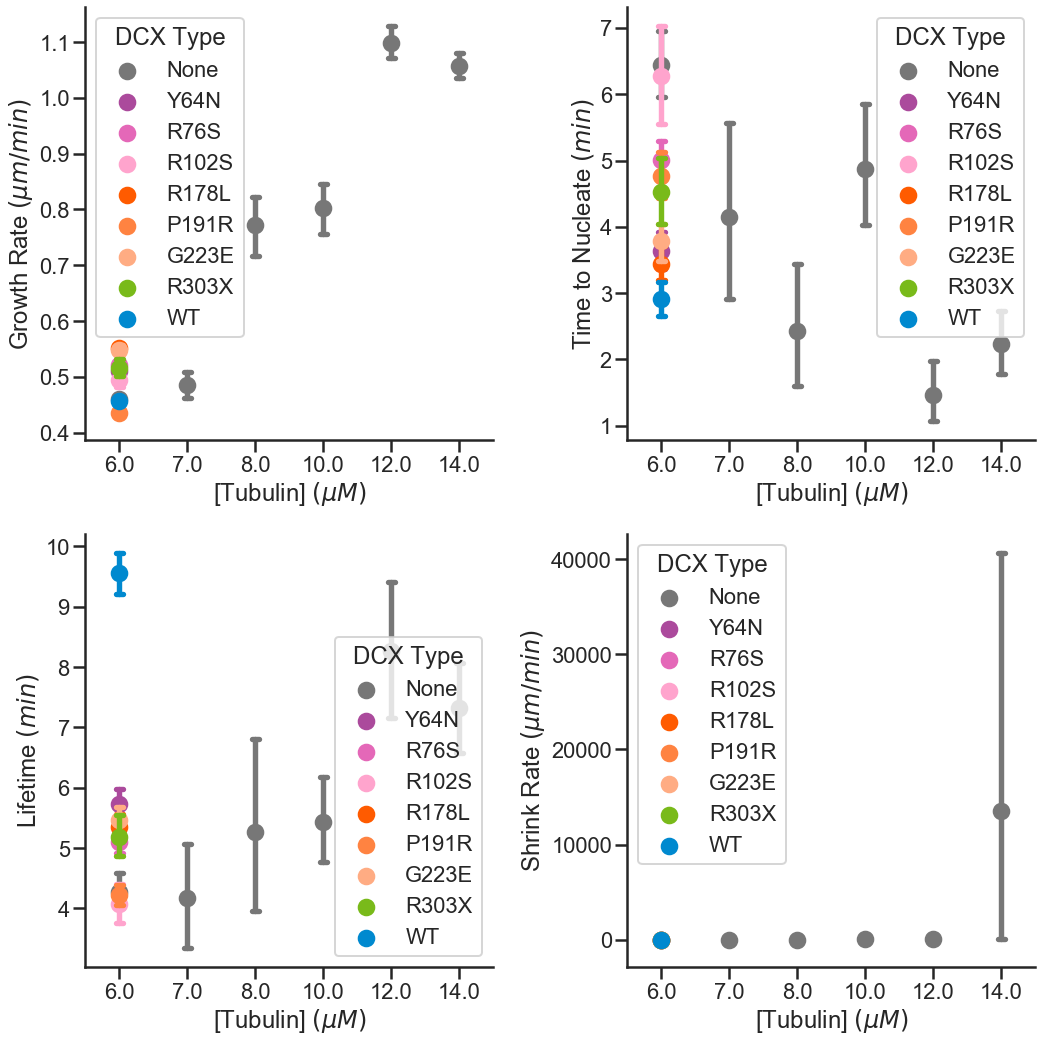

In [20]:
fig, axs = plt.subplots(2,2,figsize=(15,15))
sns.set_style("ticks")

c = 0
for i in [0,1]:
    for j in [0,1]:
        sns.pointplot(x=tubulin, y=parameters[c],
                        hue=Type, style = DCXconc , err_style="bars", marker='o', join=False, capsize=.1,
                        data=data,err_kws={'capsize':10},ci=95 , palette=palette,ax=axs[i][j])
        c += 1
        
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()
#plt.savefig(path/('plots'+date+'.pdf'))
#plt.savefig(path/('plots'+date+'.png'))

# Fitting Data #

In [21]:
def gaussian(x, mu, sig):
    return (np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))) )/(sig*np.sqrt(2*np.pi))

def exponential(x, scale):
    return ((np.exp(-x/scale) )/(scale))

def gamma(x, shape, scale):
    return (np.power(x,shape-1)*np.exp(-x/ scale))/(sp.special.gamma(shape) * np.power(scale,shape))


In [22]:
def make_hist(data, parameter, tubconc, dcxtype, dcxconc) :
    
    selectdata = data[(data[tubulin]==tubconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)]
    
    if parameter == GrowthRate :
        maxbin = 1.5
        binsize = 0.05
#     elif parameter == ShrinkageRate :
#         maxbin = 15
#         binsize = 0.1
    else:
        maxbin = 30
        binsize = 1
        
    n, bins, patches = plt.hist(selectdata[parameter], bins=np.arange(0, maxbin + binsize, binsize), density=True);
    plt.clf()
       
    return n, bins

In [23]:
def equation_fit(data, parameter):
    
    if (parameter ==  GrowthRate) | (parameter == ShrinkageRate) :
        equation = gaussian
    elif parameter == TimeToNucleate :
        equation = exponential
    elif parameter == Lifetime :
        equation = gamma
        
    results = pd.DataFrame(columns=[] , index=[])
    
    for tubconc in data[tubulin].unique():
        for dcxtype in data[Type].unique():
            for dcxconc in data[DCXconc].unique():
                
                n, bins =  make_hist(data, parameter, tubconc, dcxtype, dcxconc)      
                
                if np.isnan(np.sum(n)) == True:
                    continue

                if equation == gamma :
                    coeff, var_matrix = sp.optimize.curve_fit(equation,bins[:-1],n,[2,1])
                else :
                    coeff, var_matrix = sp.optimize.curve_fit(equation,bins[:-1],n)

                variance = np.diagonal(var_matrix) #Refer [3]
                SE = np.sqrt(variance) #Refer [4]

            #======Making a data frame========
                results0 = pd.DataFrame(columns=[] , index=[])
                for k in np.arange(0,len(coeff)):
                    header = [np.array([parameter]),np.array(['Coefficient '+ str(k)])]
                    r0 = pd.DataFrame([coeff[k],SE[k]], index=(['Value','SE']),columns= header)
                    results0 = pd.concat([results0, r0], axis=1, sort=False)

                results0[tubulin] = tubconc
                results0[Type] = dcxtype
                results0[DCXconc] = dcxconc

                results = pd.concat([results, results0], sort=False)

    return results

In [24]:
newmydir = path/(date+'_fitdata')
newmydir.mkdir(exist_ok=True)
newmydir

WindowsPath('D:/Sofia/Data_Sheets_summer/2022-07-05_fitdata')

In [25]:
GrowthRateFit = equation_fit(data, GrowthRate);
TimeToNucleateFit = equation_fit(data, TimeToNucleate);
LifetimeFit = equation_fit(data, Lifetime);
ShrinkageRateFit = equation_fit(data, ShrinkageRate);

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in power
  


<Figure size 432x288 with 0 Axes>

In [26]:
GrowthRateFit = GrowthRateFit.rename(columns={'Coefficient 0': 'Mean'})
TimeToNucleateFit = TimeToNucleateFit.rename(columns={'Coefficient 0': 'Mean'})
ShrinkageRateFit = ShrinkageRateFit.rename(columns={'Coefficient 0': 'Mean'})

LifetimeCoeff0 = LifetimeFit[Lifetime]['Coefficient 0'].loc['Value'].values
LifetimeCoeff1 = LifetimeFit[Lifetime]['Coefficient 1'].loc['Value'].values
LifetimeSE0 = LifetimeFit[Lifetime]['Coefficient 0'].loc['SE'].values
LifetimeSE1 = LifetimeFit[Lifetime]['Coefficient 1'].loc['SE'].values
LifetimeMean = LifetimeCoeff0*LifetimeCoeff1
LifetimeSE = LifetimeCoeff0*LifetimeSE1 + LifetimeCoeff1*LifetimeSE0

LifetimeMeanDF = pd.DataFrame(columns=[] , index=[])
header = [np.array([Lifetime]),np.array(['Mean'])]  
for i in np.arange(0,len(LifetimeMean)):
    r0 = pd.DataFrame([LifetimeMean[i],LifetimeSE[i]], index=(['Value','SE']),columns= header)
    LifetimeMeanDF = pd.concat([LifetimeMeanDF, r0], sort=False)

ResultFit = pd.concat([GrowthRateFit, TimeToNucleateFit,LifetimeFit,LifetimeMeanDF,ShrinkageRateFit], axis=1, sort=False)
ResultFit = ResultFit.loc[:,~ResultFit.columns.duplicated()]

ResultFit.to_csv(newmydir/('ResultFit_'+date+'.csv'), encoding='utf-8', index=False)
ResultFit

Growth Rate $(\mu m / min)$               [Tubulin] $(\mu M)$ DCX Type  \
                             Mean Coefficient 1                                
Value                    1.070577      0.157043                12.0     None   
SE                       0.008903      0.007290                12.0     None   
Value                    0.784482      0.155758                 8.0     None   
SE                       0.027164      0.022180                 8.0     None   
Value                    0.426422      0.099187                 6.0     None   
...                           ...           ...                 ...      ...   
SE                       0.007950      0.006515                14.0     None   
Value                    0.699985      0.299482                10.0     None   
SE                       0.063419      0.052191                10.0     None   
Value                    0.444294      0.093886                 7.0     None   
SE                       0.011957      0.009763                 7.0     None   

      [DCX] $(n M)$ Time to Nucleate $(min)$ Lifetime $(min)$                \
                                        Mean    Coefficient 0 Coefficient 1   
Value             0                 1.682285         1.343197      6.367731   
SE                0                 0.081344         0.222700      1.475304   
Value             0                 2.551804         1.000000      3.918504   
SE                0                 0.194755         0.206588      0.882793   
Value             0                 6.709642         1.053317      3.005446   
...             ...                      ...              ...           ...   
SE                0                 0.109731         0.172690      1.431188   
Value             0                 3.706762         1.041962      4.471034   
SE                0                 0.244202         0.155988      0.780843   
Value             0                 4.152196         1.215432      2.849051   
SE                0                 0.750850         0.150607      0.386815   

                Shrink Rate $(\mu m / min)$                
           Mean                        Mean Coefficient 1  
Value  8.553119                   21.603523      5.500990  
SE     3.399719                    0.773843      0.633709  
Value  3.918505                   17.938996      4.131034  
SE     1.692308                    0.855468      0.699308  
Value  3.165688                   13.592666      6.426103  
...         ...                         ...           ...  
SE     2.813116                    0.569988      0.468668  
Value  4.658649                   19.051355      5.591572  
SE     1.511039                    0.549069      0.456008  
Value  3.462828                   12.426828      5.414029  
SE     0.899235                    0.919834      0.755402  

[92 rows x 11 columns]

#  PLOT DATA  #

In [27]:
def filter_variable(variable, filtername, filtervalue,data):  
    x = data[data[filtername] == filtervalue][variable].loc['Value']
    if isinstance(x, (np.ndarray)) == True :
        x = x.values
    return x

def filter_parameter(parameter, moment , filtername, filtervalue, value,data):  
    x = data[data[filtername] == filtervalue][parameter][moment].loc[value]
    if isinstance(x, (np.ndarray)) == True  :
        x = x.values
    return x

In [28]:
# plottypes = np.concatenate((data[Type].unique()[:2],data[Type].unique()[5:-1]), axis=None)
# palette = np.concatenate((palette[:2],palette[5:-1]), axis=None)

# plottypes,palette

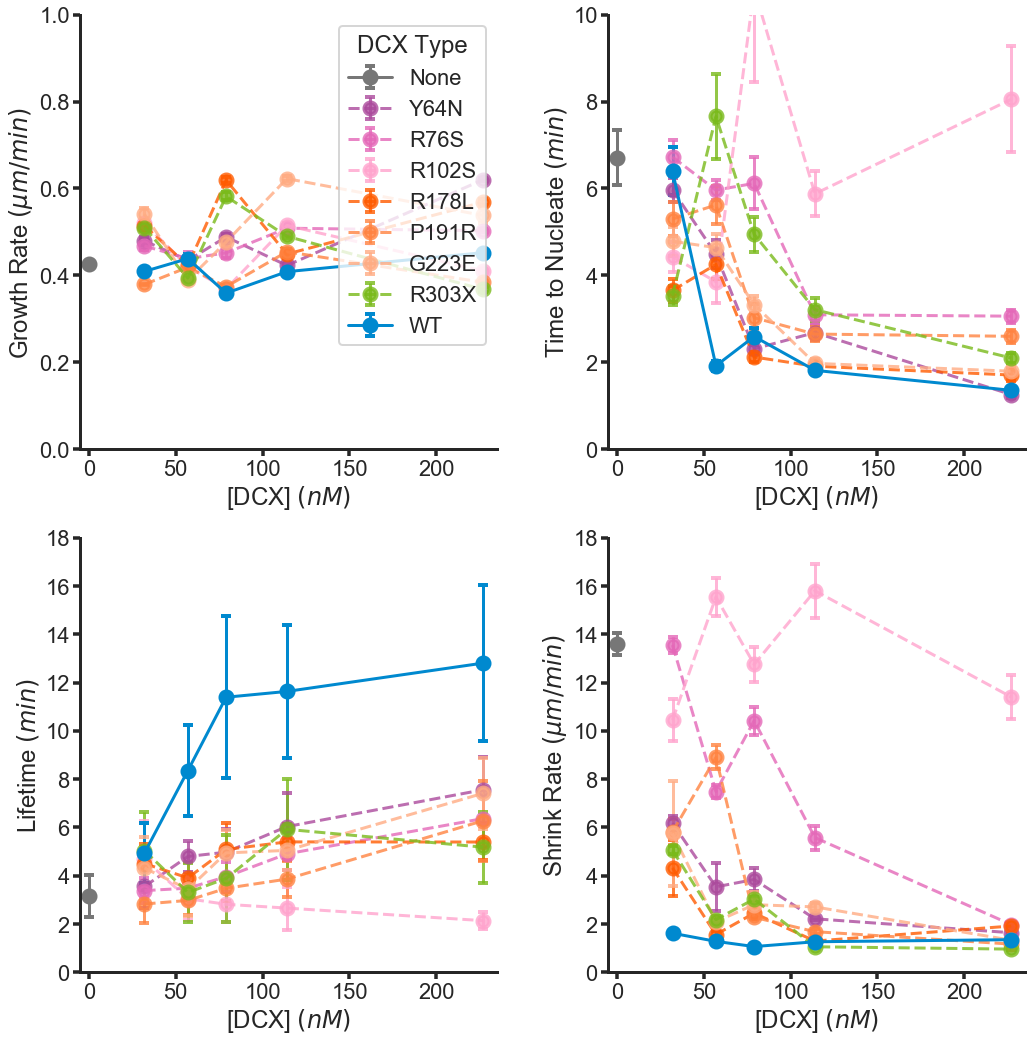

In [29]:
parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]
titles = ('Growth','Nucleation','Lifetime','Shronkage Rate')
ylables = (GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate)

scattersize = 12
cap = 5

fig, ax = plt.subplots(2,2,figsize=(15,15))
#     plt.suptitle('Fitted pooled data', fontsize=30)

count = 0
for dcxtype in Type_order: #data[Type].unique() #plottypes

    x = filter_variable(DCXconc, Type, dcxtype,ResultFit[ResultFit[tubulin]==6])
    
    c=0
    for i in np.arange(len(ax)):
        for j in np.arange(len(ax)):

            y = filter_parameter(parameters[c], 'Mean' , Type, dcxtype , 'Value',ResultFit[ResultFit[tubulin]==6])
            yerr = filter_parameter(parameters[c], 'Mean' , Type, dcxtype , 'SE', ResultFit[ResultFit[tubulin]==6])
            
            if dcxtype == 'None' or  dcxtype == 'WT':

                ax[i][j].errorbar(x , y , yerr= yerr , fmt='',marker='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,elinewidth=3,color=palette[count], alpha = 1)
            
            else:
                ax[i][j].errorbar(x , y , yerr= yerr , fmt='--',marker='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,elinewidth=3,color=palette[count], alpha = 0.80)

            c += 1
    count += 1

ax[0][0].set_ylim(0,1)
ax[1][0].set_ylim(0,18)
ax[0][1].set_ylim(0,10)
ax[1][1].set_ylim(0,18)

count = 0
for i in np.arange(len(ax)):
    for j in np.arange(len(ax)):
    
        ax[i][j].set_xlim(-5,235)
        ax[i][j].set_xlabel(DCXconc)
        ax[i][j].set_xticks(np.arange(0, 235, 50))
        ax[i][j].set_ylabel(ylables[count])
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['left'].set_lw(3)
        ax[i][j].spines['bottom'].set_lw(3)
        ax[i][j].tick_params(axis='both', width = 3.5, length = 7)
        #ax[i][1].legend((Type_order),loc='upper right',title='DCX Type')
        #ax[i][j].set_title(titles[count])
        
        count += 1

ax[0][0].legend((Type_order),loc='upper right',title='DCX Type')
#fig.suptitle('[Tubulin] ' r'$= 6 \mu M$')
plt.tight_layout()
#plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
plt.savefig(newmydir/('joint_graphsFit_ctetubulin_all_'+date+'.svg'))

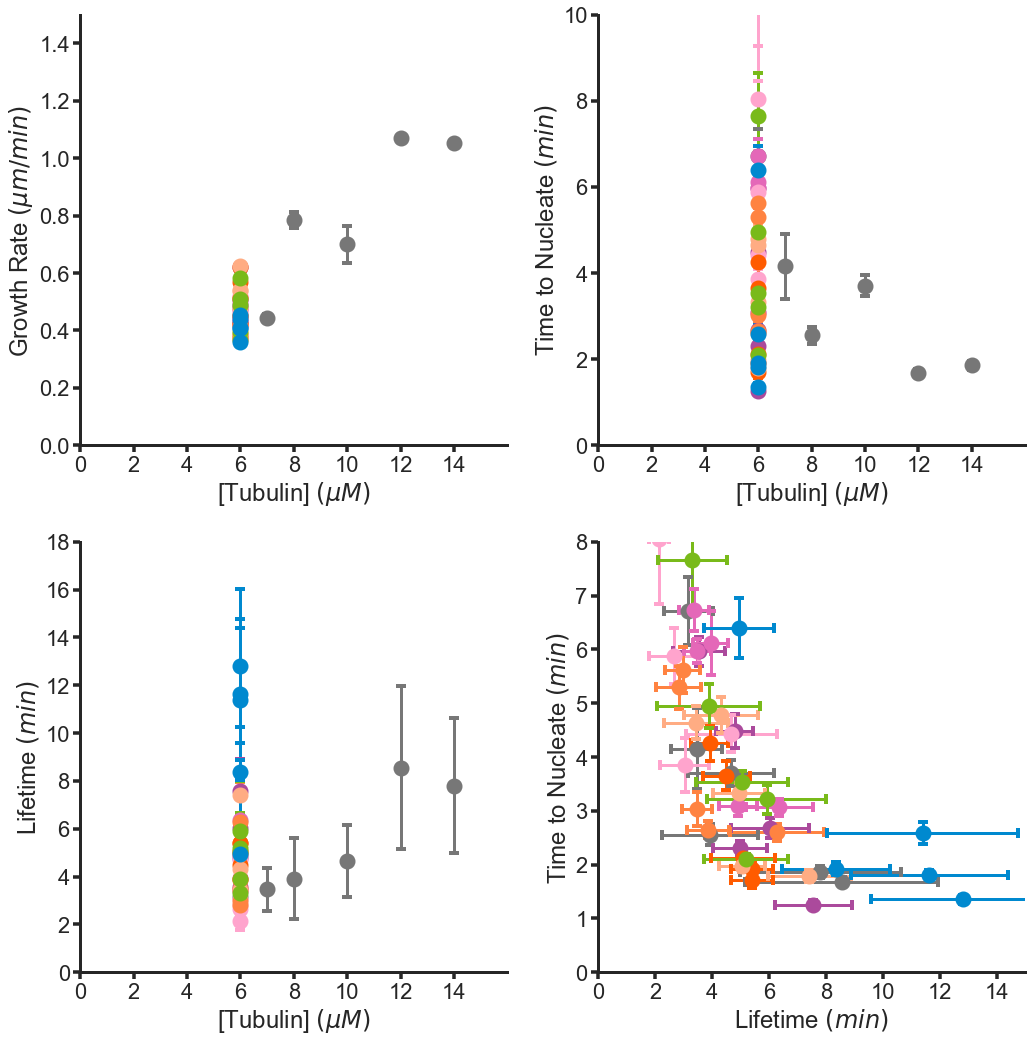

In [30]:
parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]
titles = ('Growth','Nucleation','Lifetime','Correlation')
ylables = (GrowthRate,TimeToNucleate,Lifetime,TimeToNucleate)

scattersize = 12
cap = 5

fig, ax = plt.subplots(2,2,figsize=(15,15))
#     plt.suptitle('Fitted pooled data', fontsize=30)

count = 0
for dcxtype in data[Type].unique():
    
    x = filter_variable(tubulin, Type, dcxtype,ResultFit)
    c=0
    for i in np.arange(len(ax)):
        for j in np.arange(len(ax)):
            
            if i == j == 1:
             continue

            y = filter_parameter(parameters[c], 'Mean' , Type, dcxtype , 'Value',ResultFit)
            yerr = filter_parameter(parameters[c], 'Mean' , Type, dcxtype , 'SE', ResultFit)

            ax[i][j].errorbar(x , y , yerr= yerr , fmt='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,elinewidth=3,color=palette[count])
            c += 1
    
    ax[1][1].errorbar(filter_parameter(Lifetime, 'Mean' , Type, dcxtype , 'Value',ResultFit), filter_parameter(TimeToNucleate, 'Mean' , Type, dcxtype , 'Value',ResultFit),
                      xerr=filter_parameter(Lifetime, 'Mean' , Type, dcxtype , 'SE',ResultFit), yerr=filter_parameter(TimeToNucleate, 'Mean' , Type, dcxtype , 'SE',ResultFit),
                      markeredgewidth=4,elinewidth=3,fmt='o', markersize=scattersize,capsize = cap,color=palette[count])
    
    count += 1

ax[0][0].set_ylim(0,1.5)
ax[1][0].set_ylim(0,18)
ax[0][1].set_ylim(0,10)
ax[1][1].set_ylim(0,8)

count = 0
for i in np.arange(len(ax)):
    for j in np.arange(len(ax)):
    
        ax[i][j].set_xlim(0,16)
        ax[i][j].set_xlabel(tubulin)
        ax[i][j].set_xticks(np.arange(0, 16, 2))
        ax[i][j].set_ylabel(ylables[count])
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['left'].set_lw(3)
        ax[i][j].spines['bottom'].set_lw(3)
        ax[i][j].tick_params(axis='both', width = 3.5, length = 7)
        #ax[i][1].legend(('None','WT','P191R'),loc='upper right',title='DCX Type')
        #ax[i][j].set_title(titles[count])
        
        count += 1

ax[1][1].set_xlim(0,15)
ax[1][1].set_xlabel(Lifetime)
ax[1][1].set_xticks(np.arange(0, 16, 2))


plt.tight_layout()
#plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
plt.savefig(newmydir/('joint_graphsFit_corr_'+date+'.svg'))

# Histogram #

In [31]:
def plot_hist(data, tubconc, dcxtype, dcxconc,color) :
    
    selectdata = data[(data[tubulin]==tubconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)]
    fig, ax = plt.subplots(2,2,figsize=(15,15))
    
    n = len(selectdata.dropna().index)
    
    c=0
    for i in np.arange(len(ax)):
        for j in np.arange(len(ax)):
            parameter = parameters[c]

            if parameter == GrowthRate :
                maxbin = 1.5
                binsize = 0.025
#             elif parameter == ShrinkageRate :
#                 maxbin = 25
#                 binsize = 0.5
            else:
                maxbin = 30
                binsize = 0.5

            ax[i][j].hist(selectdata[parameter], bins=np.arange(0, maxbin + binsize, binsize), 
                          density=True,color = color,alpha = 0.5);
            ax[i][j].set_xlabel(parameter)
            ax[i][j].set_ylabel('Probability')
            ax[1][1].set_xlim(0,maxbin)
            ax[i][j].spines['right'].set_visible(False)
            ax[i][j].spines['top'].set_visible(False)
            ax[i][j].spines['left'].set_lw(3)
            ax[i][j].spines['bottom'].set_lw(3)
            
            c += 1
    
    selectcoeff = ResultFit[ResultFit[tubulin]==tubconc]
    
    x = np.arange(0, 1.5 + 0.025, 0.025)
    mu = selectcoeff[(selectcoeff[Type] == dcxtype)&(selectcoeff[DCXconc] == dcxconc)][parameters[0]]['Mean'].loc['Value']
    sig = selectcoeff[(selectcoeff[Type] == dcxtype)&(selectcoeff[DCXconc] == dcxconc)][parameters[0]]['Coefficient 1'].loc['Value']
    ax[0][0].plot(x, gaussian(x, mu, sig),color = color, lw=4);
    
    x = np.arange(0, 30 + 0.5, 0.5)
    scale = selectcoeff[(selectcoeff[Type] == dcxtype)&(selectcoeff[DCXconc] == dcxconc)][parameters[1]]['Mean'].loc['Value']
    ax[0][1].plot(x, exponential(x, scale),color = color, lw=4);
    
    shape = selectcoeff[(selectcoeff[Type] == dcxtype)&(selectcoeff[DCXconc] == dcxconc)][parameters[2]]['Coefficient 0'].loc['Value']
    scale = selectcoeff[(selectcoeff[Type] == dcxtype)&(selectcoeff[DCXconc] == dcxconc)][parameters[2]]['Coefficient 1'].loc['Value']
    ax[1][0].plot(x, gamma(x, shape, scale),color = color, lw=4);
            
    mu = selectcoeff[(selectcoeff[Type] == dcxtype)&(selectcoeff[DCXconc] == dcxconc)][parameters[3]]['Mean'].loc['Value']
    sig = selectcoeff[(selectcoeff[Type] == dcxtype)&(selectcoeff[DCXconc] == dcxconc)][parameters[3]]['Coefficient 1'].loc['Value']
    ax[1][1].plot(x, gaussian(x, mu, sig),color = color, lw=4);
    
    legnd = str(dcxconc)+' nM'
    ax[0][1].legend(('Fit',legnd),loc='upper right',title='DCX: '+dcxtype)
    #ax[1][0].legend(('Fit',legnd),loc='upper right',title='DCX: '+dcxtype)
    
    #plt.savefig(newmydir/('joint_graphsHIST-'+dcxtype+'-'+str(dcxconc)+'.pdf'))
    
    return print(n)

229


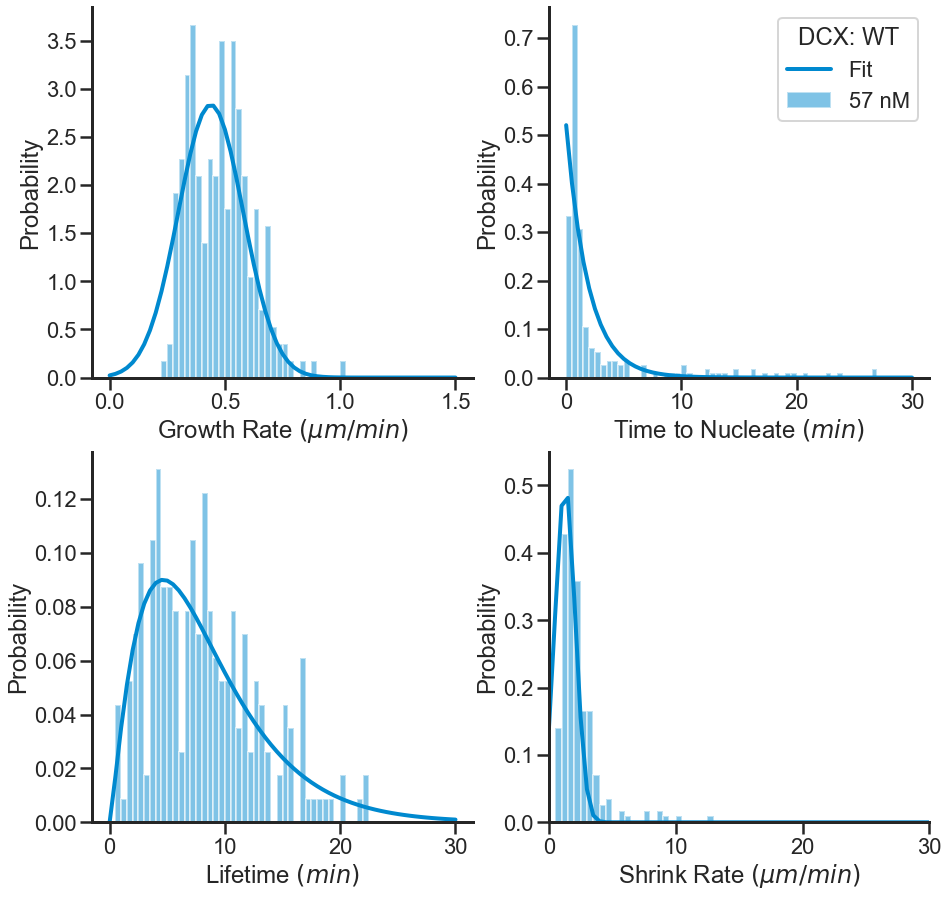

In [32]:
plot_hist(data, 6, 'WT', 57,cyan)

39


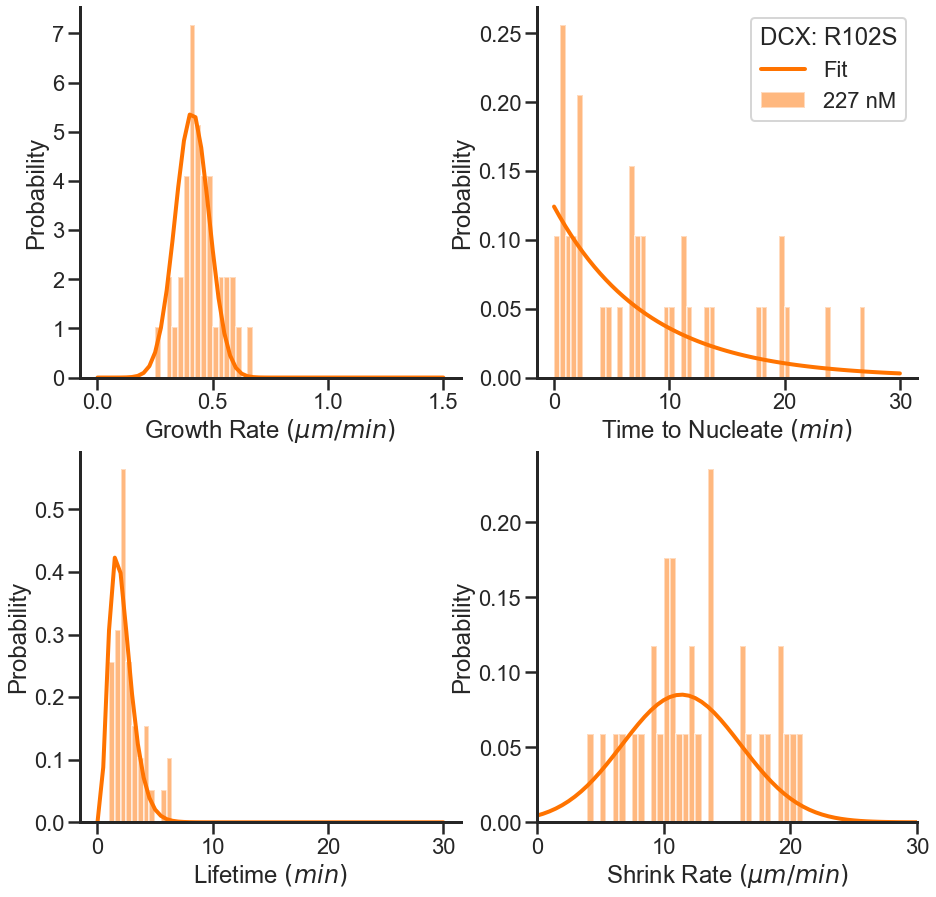

In [43]:
plot_hist(data, 6, 'R102S', 227,orange)


# Rescues #

In [34]:
def rescue_count(data):
    
    results = pd.DataFrame(columns=[] , index=[])
    
    data.loc[pd.isnull(data[GrowthRate]), ['Rescues']] = np.NaN
    
    for tubconc in data[tubulin].unique():
        for dcxtype in data[Type].unique():
            for dcxconc in data[DCXconc].unique():
                
                selectdata = data[(data[tubulin]==tubconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)]
                n =  selectdata['Rescues'].count()
                
                if n == 0:
                    continue
                    
                rv = selectdata['Rescues'].dropna().value_counts(normalize = True).to_frame()
                rescue_values = 1-rv.loc[0][0]
                

            #======Making a data frame========
                r0 = {tubulin:[tubconc], Type:[dcxtype], DCXconc:[dcxconc], 'Normalized Rescue': [rescue_values],
                     'n': [n]}
                results0 = pd.DataFrame(data=r0)
                results = pd.concat([results, results0], sort=False)

    return results

In [35]:
rescues = rescue_count(data)
rescues

,[Tubulin] $(\mu M)$,DCX Type,[DCX] $(n M)$,Normalized Rescue,n
0,12.0,None,0,0.047619,105
0,8.0,None,0,0.031250,32
0,6.0,None,0,0.009756,615
0,6.0,Y64N,32,0.000000,209
0,6.0,Y64N,57,0.034615,260
0,6.0,Y64N,79,0.075163,306
0,6.0,Y64N,114,0.247826,230
0,6.0,Y64N,227,0.868932,206
0,6.0,R76S,32,0.004405,227
0,6.0,R76S,57,0.006410,312


In [36]:
# plottypes = np.concatenate((data[Type].unique()[:2],data[Type].unique()[5:-1]), axis=None)
# palette = np.concatenate((palette[:2],palette[5:-1]), axis=None)

# plottypes,palette

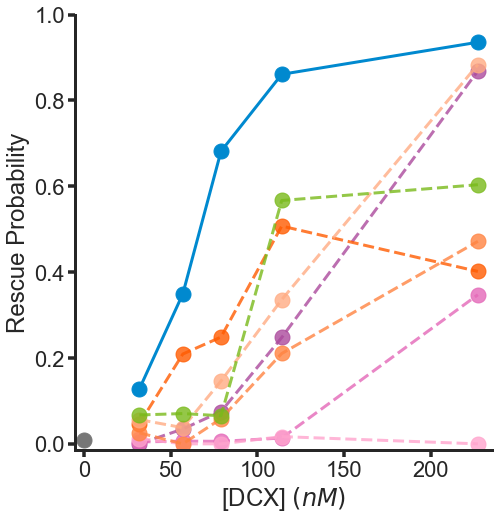

In [37]:
scattersize = 12
cap = 5

fig, ax = plt.subplots(1,1,figsize=(7.45,7.75))
#     plt.suptitle('Fitted pooled data', fontsize=30)

count = 0
for dcxtype in data[Type].unique(): #data[Type].unique()

    x = rescues[ (rescues[tubulin]==6) & (rescues[Type]== dcxtype)][DCXconc]

    y = rescues[ (rescues[tubulin]==6) & (rescues[Type]== dcxtype)]['Normalized Rescue']
    
    if dcxtype == 'None' or  dcxtype == 'WT':

        ax.plot(x , y ,color=palette[count],marker = 'o', ms=15)
    
    else:
        
        ax.plot(x , y ,color=palette[count],marker = 'o', ms=15, ls='--',alpha=0.8)

    count += 1

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)
ax.set_ylim(-0.015,1)
ax.set_xlim(-5,235)
ax.set_xlabel( DCXconc)


#ax.set_title('Rescue')
ax.set_ylabel('Rescue Probability')


#ax.legend((Type_order),loc='upper left',title='DCX Type')
#fig.suptitle('[Tubulin] ' r'$= 6 \mu M$')
plt.tight_layout()
#plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
plt.savefig(newmydir/('joint_graphsRescues_all.svg'))

# Lifetime Parameters #

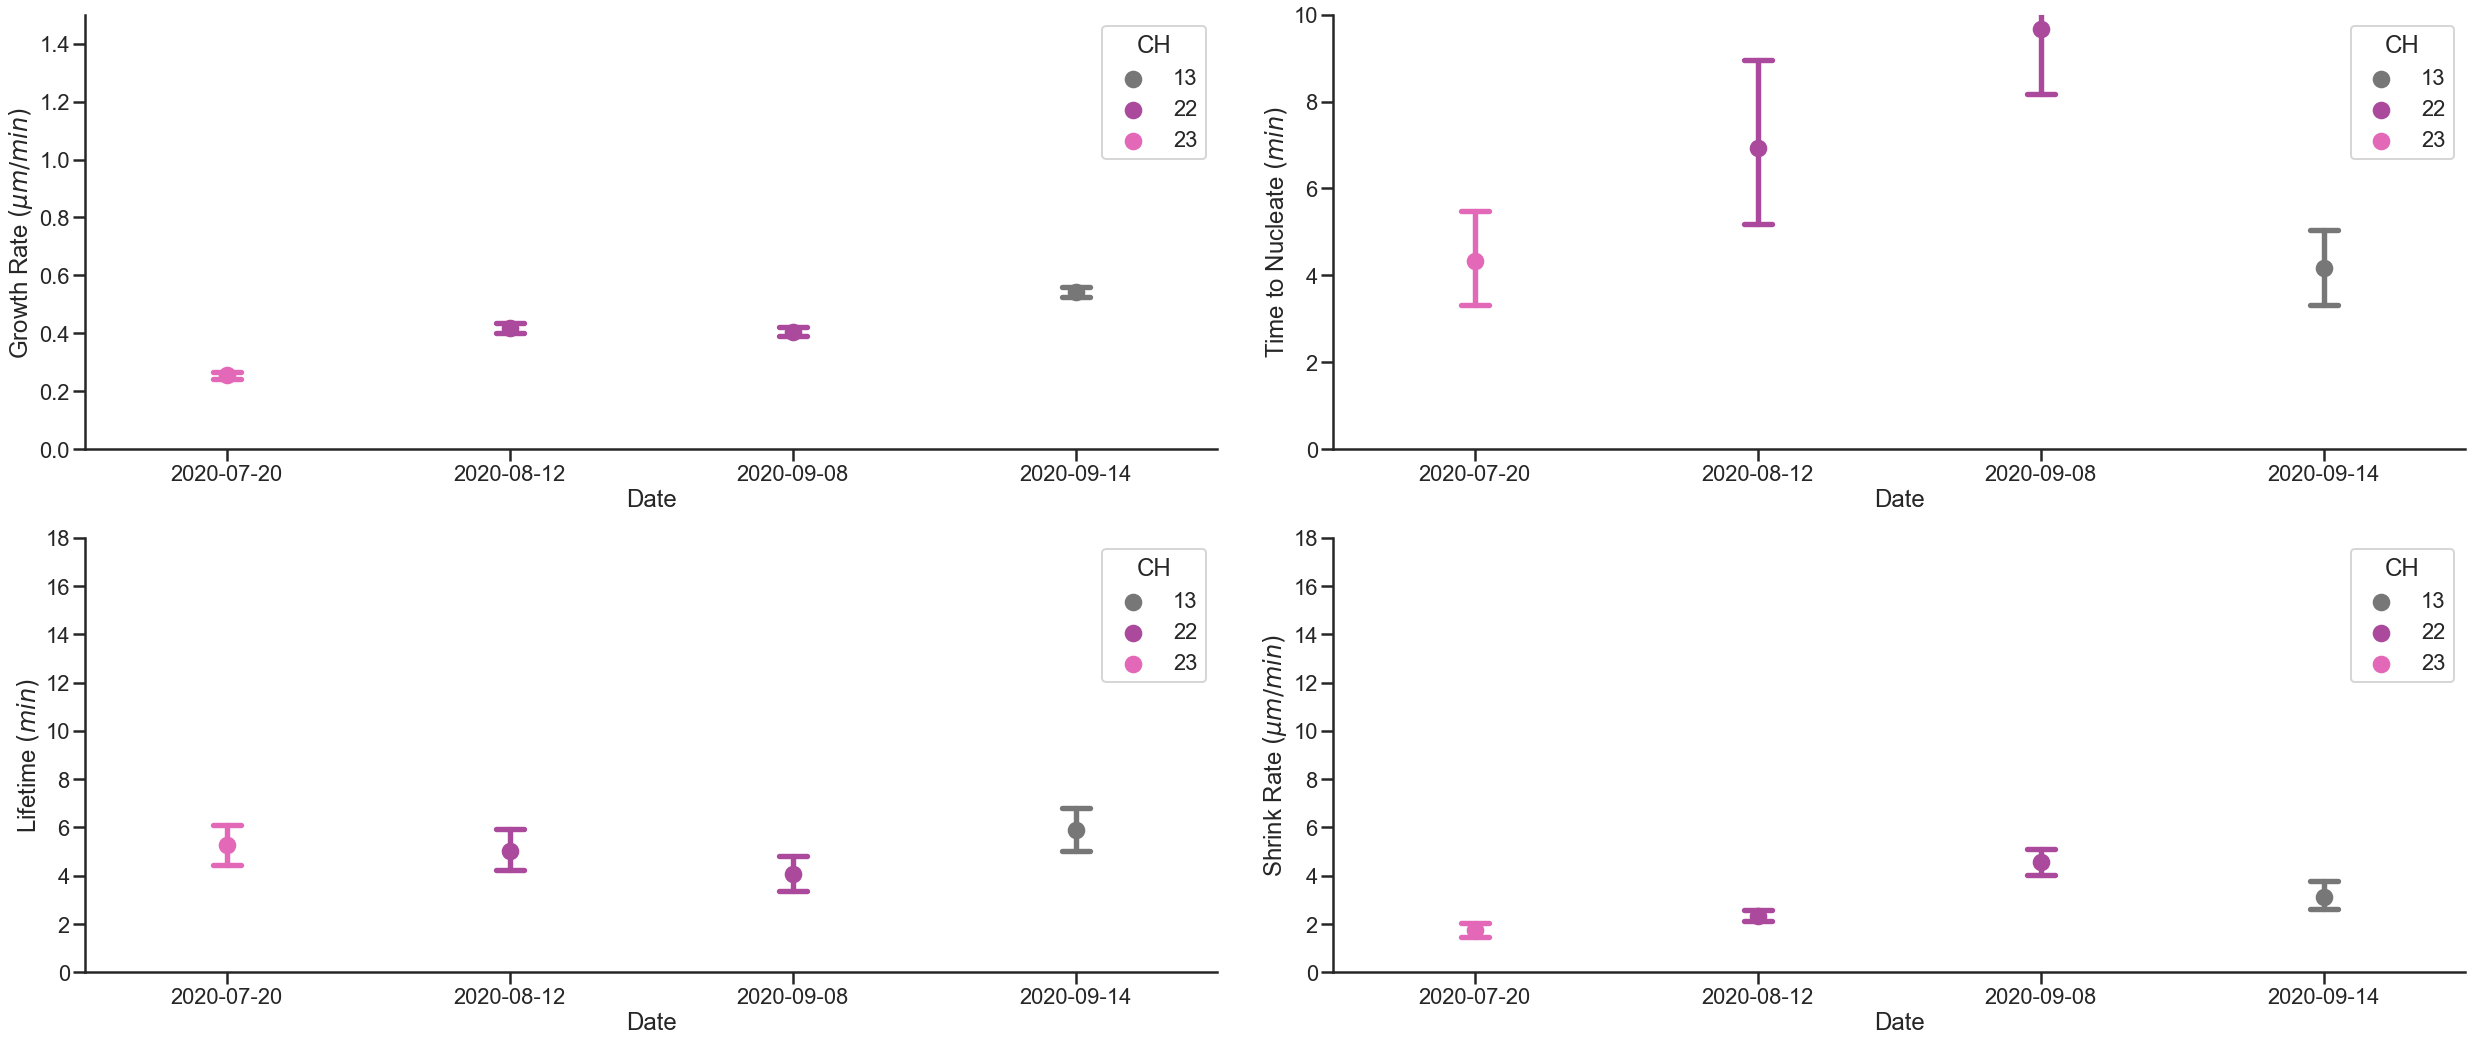

In [38]:
 selectdata = data[(data[tubulin]==6)&(data[Type]=='WT')&(data[DCXconc]==32)]

fig, axs = plt.subplots(2,2,figsize=(35,15))
sns.set_style("ticks")

c = 0
for i in [0,1]:
    for j in [0,1]:
        sns.pointplot(x='Date', y=parameters[c],
                        hue='CH', err_style="bars", marker='o', join=False, capsize=.1,
                        data=selectdata,err_kws={'capsize':10},ci=95 , palette=palette,ax=axs[i][j])
        c += 1
axs[0][0].set_ylim(0,1.5)
axs[1][0].set_ylim(0,18)
axs[0][1].set_ylim(0,10)
axs[1][1].set_ylim(0,18)       
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()


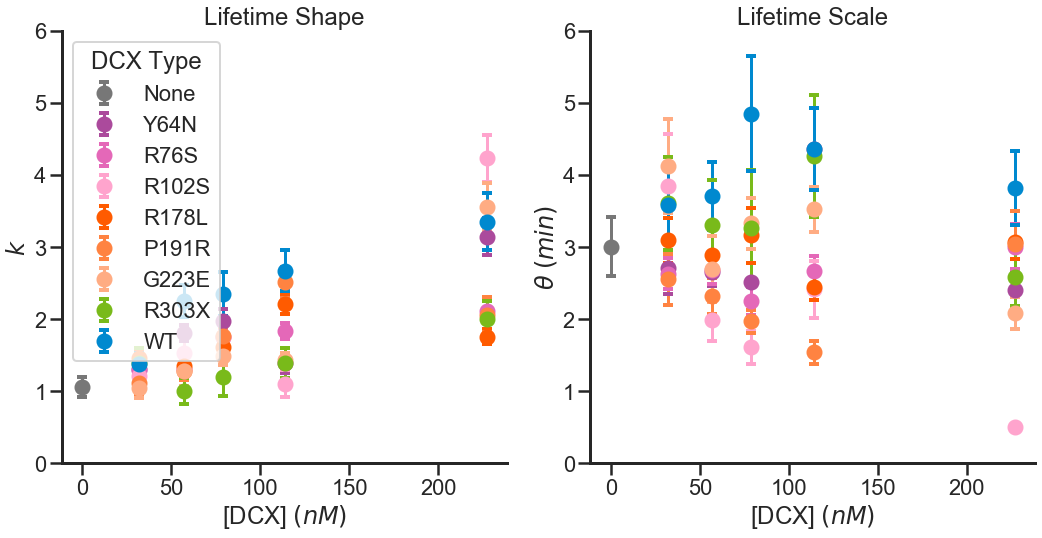

In [39]:
parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]
titles = ('Growth','Nucleation','Lifetime','Shronkage Rate')
ylables = (GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate)

scattersize = 12
cap = 5

fig, ax = plt.subplots(1,2,figsize=(15,8))
#     plt.suptitle('Fitted pooled data', fontsize=30)

count = 0
for dcxtype in data[Type].unique():

    x = filter_variable(DCXconc, Type, dcxtype,ResultFit[ResultFit[tubulin]==6])
    
    c=2
    y = filter_parameter(parameters[c], 'Coefficient 0' , Type, dcxtype , 'Value',ResultFit[ResultFit[tubulin]==6])
    yerr = filter_parameter(parameters[c], 'Coefficient 0' , Type, dcxtype , 'SE', ResultFit[ResultFit[tubulin]==6])

    ax[0].errorbar(x , y , yerr= yerr , fmt='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,elinewidth=3,color=palette[count])
    
    y = filter_parameter(parameters[c], 'Coefficient 1' , Type, dcxtype , 'Value',ResultFit[ResultFit[tubulin]==6])
    yerr = filter_parameter(parameters[c], 'Coefficient 1' , Type, dcxtype , 'SE', ResultFit[ResultFit[tubulin]==6])

    ax[1].errorbar(x , y , yerr= yerr , fmt='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,elinewidth=3,color=palette[count])

       
    count += 1

for i in [0,1]:
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['left'].set_lw(3)
    ax[i].spines['bottom'].set_lw(3)
    ax[i].set_ylim(0,6)
    ax[i].set_xlabel( DCXconc)


ax[0].set_title('Lifetime Shape')
ax[0].set_ylabel( r'$k$')

ax[1].set_title('Lifetime Scale')
ax[1].set_ylabel( r'$\theta \; (min)$')


ax[0].legend((Type_order),loc='upper left',title='DCX Type')
#fig.suptitle('[Tubulin] ' r'$= 6 \mu M$')
plt.tight_layout()
#plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
plt.savefig(newmydir/('joint_graphsFit_lifetimeparms.svg'))

In [32]:
newmydir

WindowsPath('D:/Sofia/Data_Sheets_summer/2022-06-27_fitdata')